In [1]:
import torch
from torch import nn
from torch import nn


In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
device = 'mps'

In [4]:
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If image folde doesn't  exist download it and prepare it

if image_path.is_dir():
    print (f"{image_path} directory already exist, skipping download")
else:
    print(f'{image_path} doesnt exist, creating one' )
    image_path.mkdir(parents=True, exist_ok=True)

#Making file and filling it with download content
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:  #Creating file pizza_steak_sushi || wb - write permission
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print ("Downloading")
    f.write(requests.content) #Writes dowloaded ti a file in with open string

 
#Unzip pizza steak sushi dataset
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping")
    zip_ref.extractall(image_path)





data/pizza_steak_sushi directory already exist, skipping download
Downloading
Unzipping


In [5]:
image_path

PosixPath('data/pizza_steak_sushi')

In [6]:
#Becoming one with data

import os 

def walk_through_dir(path):
    for dirpath, dirnames, filenames in os.walk(path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
        
        

In [7]:
walk_through_dir(image_path)

There are 2 directories and 1 files in data/pizza_steak_sushi
There are 3 directories and 1 files in data/pizza_steak_sushi/test
There are 0 directories and 19 files in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 files in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 files in data/pizza_steak_sushi/test/pizza
There are 3 directories and 1 files in data/pizza_steak_sushi/train
There are 0 directories and 75 files in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 files in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 files in data/pizza_steak_sushi/train/pizza


In [8]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [9]:
#Visualize the images
import random
from PIL import Image



# Get all images paths
# Pick a random image using random.choice()
# Get image class name using pathlib.Path.parent.stem
# Open image using PIL
# Show image metadata
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list


[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi

In [10]:
random_image_path = random.choice(image_path_list)
random_image_path
    

PosixPath('data/pizza_steak_sushi/train/pizza/2924941.jpg')

In [11]:
image_class = random_image_path.parent.stem
image_class

'pizza'

In [12]:
img = Image.open(random_image_path)

random image path: data/pizza_steak_sushi/train/pizza/2924941.jpg
random_image class: pizza
image height: 512
image width: 508


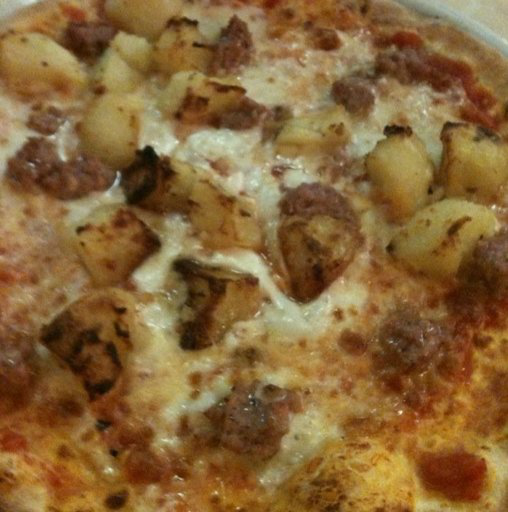

In [13]:
print(f'random image path: {random_image_path}')
print(f'random_image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img

(-0.5, 507.5, 511.5, -0.5)

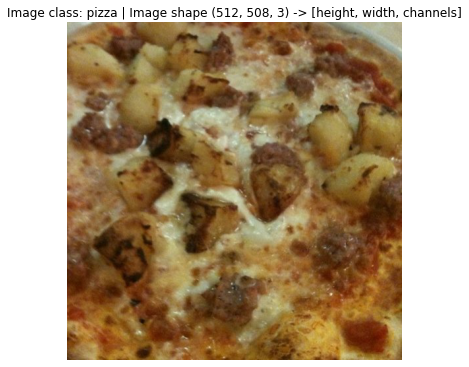

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Show image with matplotlib
image_as_array = np.asarray(img)

plt.figure(figsize=(6,8))
plt.imshow(image_as_array)
plt.title(f'Image class: {image_class} | Image shape {image_as_array.shape} -> [height, width, channels]')
plt.axis(False)

Turning images into Torch tensors format


turn images into torch.utils.data.Dataset and subsequently to torch.utils.data.DataLoader we'll call it Dataset and DataLoader



In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


Transforming data with torchvision.transforms

In [16]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [17]:
data_transform(img=img).shape

torch.Size([3, 64, 64])

In [18]:
data_transform(img)

tensor([[[0.6863, 0.6824, 0.6902,  ..., 0.6980, 0.6980, 0.7098],
         [0.6510, 0.6471, 0.6196,  ..., 0.7059, 0.6980, 0.6863],
         [0.6118, 0.6314, 0.6588,  ..., 0.6941, 0.7059, 0.7020],
         ...,
         [0.5020, 0.5608, 0.6314,  ..., 0.6314, 0.6627, 0.6157],
         [0.4824, 0.5608, 0.6078,  ..., 0.6706, 0.6745, 0.5686],
         [0.4078, 0.4941, 0.5569,  ..., 0.6314, 0.6471, 0.5373]],

        [[0.6941, 0.6863, 0.6902,  ..., 0.6980, 0.6863, 0.6824],
         [0.6510, 0.6118, 0.5490,  ..., 0.7020, 0.6863, 0.6667],
         [0.5647, 0.5490, 0.5490,  ..., 0.6941, 0.6941, 0.6863],
         ...,
         [0.3020, 0.3725, 0.4667,  ..., 0.4667, 0.5686, 0.5137],
         [0.3176, 0.4118, 0.4745,  ..., 0.5176, 0.5725, 0.4471],
         [0.2627, 0.3451, 0.4275,  ..., 0.4667, 0.5098, 0.4000]],

        [[0.6039, 0.6157, 0.6118,  ..., 0.5804, 0.5647, 0.5569],
         [0.5765, 0.5294, 0.4235,  ..., 0.5922, 0.5765, 0.5490],
         [0.4471, 0.4078, 0.3725,  ..., 0.5882, 0.5686, 0.

Visualising transfored image

In [19]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].axis(False)
            ax[0].set_title(f'Original\nSize: {f.size}')

            #Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) #changing shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)



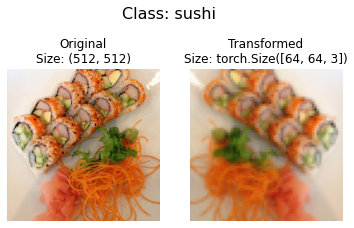

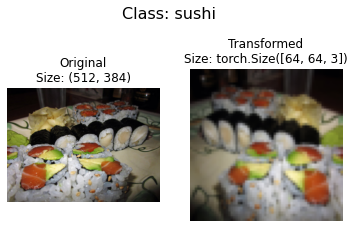

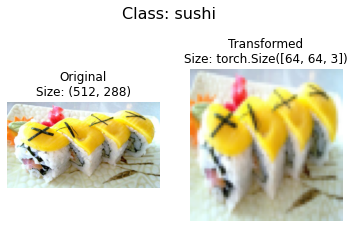

In [20]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform,
                        n=3, seed=46)

Loding images data using ImageFolder

In [21]:
from torchvision import datasets

In [22]:
# Use ImageFolder to create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #transform for data
                                  target_transform=None)  #transform for target


test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform) #transform for data
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [23]:
# Getting class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [24]:
#Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [25]:
len(train_data), len(test_data)

(225, 75)

In [26]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [27]:
# Index on tran_data Dataset ti get single image and label
img, label = train_data[0][0], train_data[0][1]
print (f'Image tenor:\n {img}')
print (f'image shape {img.shape}')
print (f'Image datatype {img.dtype}')
print (f'Image label {label}')
print (f'Label datatype {type(label)}')



Image tenor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

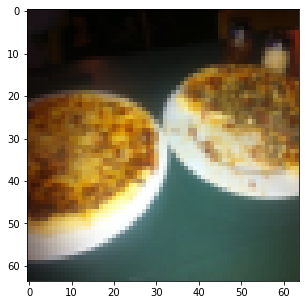

In [28]:
#Changing colorchannels  to see image in matplotlib

permuted_image = img.permute(1,2,0)

plt.figure(figsize=(5,5))
plt.imshow(permuted_image)


Making a DataLoader from Dataset. It makes images iterable and set a batchsize

In [29]:
# Turn train and test datasets into Dataloader

In [30]:
import os
os.cpu_count()

8

In [31]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count(),
                               shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count(),
                               shuffle=False)  

In [32]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x176977250>,
 <torch.utils.data.dataloader.DataLoader at 0x176977b80>)

In [33]:
len(train_data_loader), len(test_data_loader)

(225, 75)

In [34]:
img, label = next(iter(train_data_loader))
print (f'Image shape: {img.shape} -> batch_size, color_channels, height, width')
print (f'Label shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64]) -> batch_size, color_channels, height, width
Label shape: torch.Size([1])


MAKING DATASEST WITHOUT IMAGE_Folder CLASS and UseIt with DataLoader

Replicating Image_folder Class

In [35]:
# Want to load images from file
# Want to be able to get class names from Dataset
# Want to be able to get classes as dictionary from the Dataset
 

HAVENT DONE ONLY WATCHED IF YOU NEED WATCH IT

----------------------------------------------------------
Data Augmentation
----------------------------------------------------------


In [36]:
from torchvision import transforms

In [37]:
train_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.ToTensor()])

In [38]:
#GEt all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:5]

[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg')]

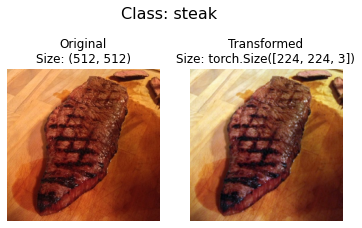

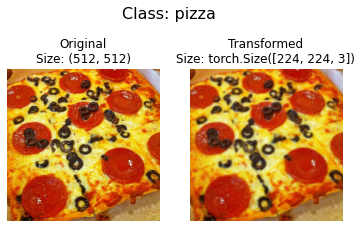

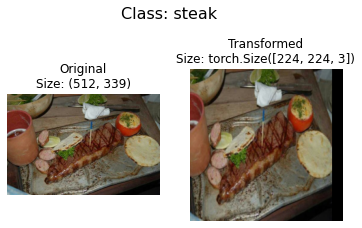

In [39]:
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transforms,
                        n=3,
                        seed=None)

Model 0: Making test with TINY VGG without data augmentation from CNN Explainew Web Site

In [40]:
#Creating transforms and loading data for model_0

simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [41]:
#Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# Turan the dataset into DataLoaders
import os
from torch.utils.data import DataLoader

#Setup batch size and number of works
BATCH_SIZE = 32
#NUM_WORKERS = os.cpu_count()
NUM_WORKERS = 2

#Create DataLoader

train_data_loader_simple = DataLoader(dataset=train_data_simple,
                               batch_size=BATCH_SIZE,
                               shuffle=True,
                               num_workers=NUM_WORKERS
                               )

test_data_loader_simple = DataLoader(dataset=test_data_simple,
                               batch_size=BATCH_SIZE,
                               shuffle=False,
                               num_workers=NUM_WORKERS
                               )

In [42]:
#MAking TinyVgg model Class
from torch import nn

class TinyVGG(nn.Module):
    '''Model architecture from CNN Explainer'''

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int)-> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Dropout(0.2),    
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #For MaxPool default stride is same as kernel_size
            

        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #For MaxPool default stride is same as kernel_size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13, #Got 13*13 from first lainch error RuntimeError: linear(): input and weight.T shapes cannot be multiplied (32x1690 and 10x3)
                      out_features=output_shape)
                      
            )




    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
    #   Alternative and faster (FUSION operator)return self.classifier(self.conv_block_2(self.conv_block_1(x)))




         
         


In [43]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0 

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [44]:
### Try a forward pass of single image to test a model and to know output features

image_batch, label_batch = next(iter(train_data_loader_simple))
image_batch.shape, label_batch.shape
                                

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [45]:
#Try forward path
model_0(image_batch.to(device))

tensor([[ 0.0027, -0.0031,  0.0153],
        [ 0.0187,  0.0209,  0.0226],
        [ 0.0228,  0.0174,  0.0276],
        [ 0.0279, -0.0047,  0.0104],
        [ 0.0171,  0.0235,  0.0132],
        [ 0.0174, -0.0045,  0.0316],
        [ 0.0325,  0.0035,  0.0304],
        [ 0.0224, -0.0048,  0.0038],
        [ 0.0186, -0.0251,  0.0075],
        [ 0.0366,  0.0122,  0.0274],
        [ 0.0204, -0.0122,  0.0170],
        [ 0.0129,  0.0026,  0.0162],
        [ 0.0006, -0.0080,  0.0304],
        [ 0.0240,  0.0204,  0.0359],
        [-0.0114, -0.0143,  0.0300],
        [ 0.0301, -0.0124,  0.0064],
        [ 0.0217, -0.0023,  0.0362],
        [ 0.0161, -0.0084,  0.0041],
        [ 0.0066,  0.0165,  0.0128],
        [ 0.0251,  0.0148,  0.0230],
        [ 0.0196,  0.0176,  0.0125],
        [ 0.0102, -0.0032,  0.0198],
        [ 0.0115,  0.0019,  0.0074],
        [ 0.0257, -0.0277,  0.0352],
        [ 0.0037,  0.0059, -0.0027],
        [ 0.0293,  0.0039,  0.0217],
        [ 0.0162, -0.0055,  0.0214],
 

Using torchinfo for checking shapes

In [46]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Dropout: 2-3                      [1, 10, 62, 62]           --
│    └─Conv2d: 2-4                       [1, 10, 60, 60]           910
│    └─ReLU: 2-5                         [1, 10, 60, 60]           --
│    └─Dropout: 2-6                      [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-7                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-8                       [1, 10, 28, 28]           910
│    └─ReLU: 2-9                         [1, 10, 28, 28]           --
│    └─Dropout: 2-10                     [1, 10, 28, 28]           --
│    └─Conv2

Creating trainig and test loops fo ANY model and dataloader

In [47]:
# train_step() takes a model  and dataloader and trains the model on the dataloader
# test_step() takes a model  and dataloader and evaluates the model on the dataloader

In [48]:
#import torch.utils.data.dataloader

In [49]:
def train_step(model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        #y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        #train_acc += (y_pred_class == y).sum().item()/len(y_pred)

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)

        #Averiging metrics to average fo the epoch

    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)

    return train_loss, train_acc






In [50]:
#Create a test step 
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    
    model.eval()

    test_loss, test_acc = 0, 0      

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)

    return test_loss, test_acc



In [51]:
# Making training functions
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 20,
          device=device):
    
    #Create dict for results
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        print(f"Epoch: {epoch} | Train_loss: {train_loss:.4f}, Train_acc: {train_acc:.4f}, Test_loss: {test_loss:.4f}, Test_acc: {test_acc:.4f}")
        

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results
          

In [52]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

model_0 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_data_loader_simple,
                        test_dataloader=test_data_loader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.1087, Train_acc: 0.2852, Test_loss: 1.0986, Test_acc: 0.1979
Epoch: 1 | Train_loss: 1.1012, Train_acc: 0.2773, Test_loss: 1.1012, Test_acc: 0.2188
Epoch: 2 | Train_loss: 1.0915, Train_acc: 0.3398, Test_loss: 1.0859, Test_acc: 0.3920
Epoch: 3 | Train_loss: 1.1200, Train_acc: 0.3281, Test_loss: 1.0933, Test_acc: 0.3220
Epoch: 4 | Train_loss: 1.0527, Train_acc: 0.5117, Test_loss: 1.1201, Test_acc: 0.1979
Epoch: 5 | Train_loss: 1.0472, Train_acc: 0.4414, Test_loss: 1.1229, Test_acc: 0.2188
Epoch: 6 | Train_loss: 0.9802, Train_acc: 0.5078, Test_loss: 1.1099, Test_acc: 0.3125
Epoch: 7 | Train_loss: 0.8637, Train_acc: 0.6016, Test_loss: 1.1607, Test_acc: 0.2699
Epoch: 8 | Train_loss: 0.8061, Train_acc: 0.6367, Test_loss: 1.0660, Test_acc: 0.3532
Epoch: 9 | Train_loss: 1.0845, Train_acc: 0.4883, Test_loss: 1.1585, Test_acc: 0.2500
Training time: 232.657


In [53]:
model_0_results

{'train_loss': [1.1087046265602112,
  1.1011898815631866,
  1.0915422439575195,
  1.120021753013134,
  1.0527129098773003,
  1.0472283065319061,
  0.980201780796051,
  0.8637217581272125,
  0.8061026185750961,
  1.0845290645956993],
 'train_acc': [0.28515625,
  0.27734375,
  0.33984375,
  0.328125,
  0.51171875,
  0.44140625,
  0.5078125,
  0.6015625,
  0.63671875,
  0.48828125],
 'test_loss': [1.098551630973816,
  1.1012310187021892,
  1.0859493017196655,
  1.0932930707931519,
  1.1201050281524658,
  1.122854193051656,
  1.1099157532056172,
  1.1606768170992534,
  1.0660417079925537,
  1.158504327138265],
 'test_acc': [0.19791666666666666,
  0.21875,
  0.3920454545454546,
  0.32196969696969696,
  0.19791666666666666,
  0.21875,
  0.3125,
  0.26988636363636365,
  0.35321969696969696,
  0.25]}

In [54]:
#Plotting a loss curve of model_0


In [55]:
def plot_loss_curves(results: dict[str, list[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training accuracy')
    plt.plot(epochs, test_accuracy, label='Test accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
     






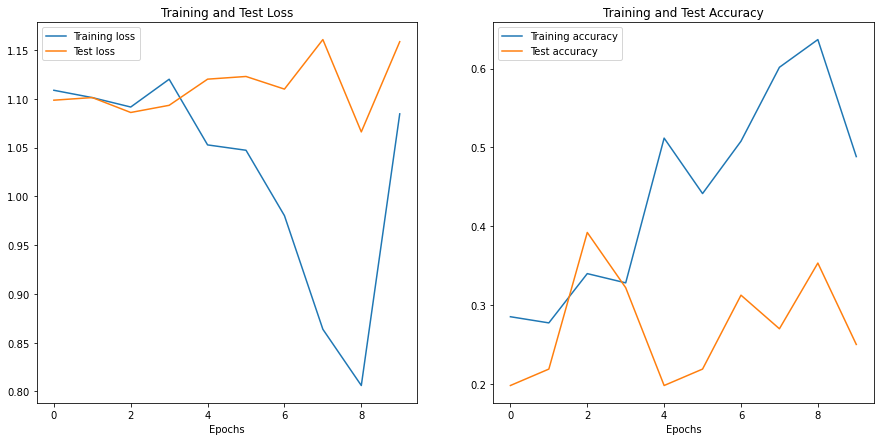

In [56]:
plot_loss_curves(model_0_results)

In [57]:
# Timny VGG with data augmentation

train_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.TrivialAugmentWide(num_magnitude_bins=31),
transforms.ToTensor()
])

test_transform_simple = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.ToTensor()
])

In [58]:
#Create train and test datasets using data augmentation
train_data_augumented = datasets.ImageFolder(root=train_dir, 
            transform=train_transform_trivial)
test_data = datasets.ImageFolder(root=test_dir, 
            transform=test_transform_simple) 
 


In [59]:
len(train_data_augumented), len(train_data_simple)

(225, 225)

In [60]:
train_dataloader_augumented = DataLoader(dataset=train_data_augumented,
batch_size=8,
shuffle=True,
num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data,
batch_size=8,
shuffle=False,
num_workers=NUM_WORKERS)

In [61]:
len(train_dataloader_augumented), len(train_data_loader_simple)

(29, 8)

In [62]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)



model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.0001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augumented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.1011, Train_acc: 0.3534, Test_loss: 1.1024, Test_acc: 0.2375
Epoch: 1 | Train_loss: 1.1011, Train_acc: 0.3233, Test_loss: 1.1049, Test_acc: 0.2375
Epoch: 2 | Train_loss: 1.0992, Train_acc: 0.3534, Test_loss: 1.1012, Test_acc: 0.2375
Epoch: 3 | Train_loss: 1.0978, Train_acc: 0.3405, Test_loss: 1.1017, Test_acc: 0.3000
Epoch: 4 | Train_loss: 1.0927, Train_acc: 0.3534, Test_loss: 1.1048, Test_acc: 0.2500
Epoch: 5 | Train_loss: 1.0950, Train_acc: 0.3405, Test_loss: 1.1043, Test_acc: 0.2625
Epoch: 6 | Train_loss: 1.0800, Train_acc: 0.4655, Test_loss: 1.1021, Test_acc: 0.2750
Epoch: 7 | Train_loss: 1.0714, Train_acc: 0.3707, Test_loss: 1.0940, Test_acc: 0.3500
Epoch: 8 | Train_loss: 1.0511, Train_acc: 0.4440, Test_loss: 1.0912, Test_acc: 0.3250
Epoch: 9 | Train_loss: 1.0568, Train_acc: 0.4397, Test_loss: 1.0902, Test_acc: 0.3375
Training time: 233.426


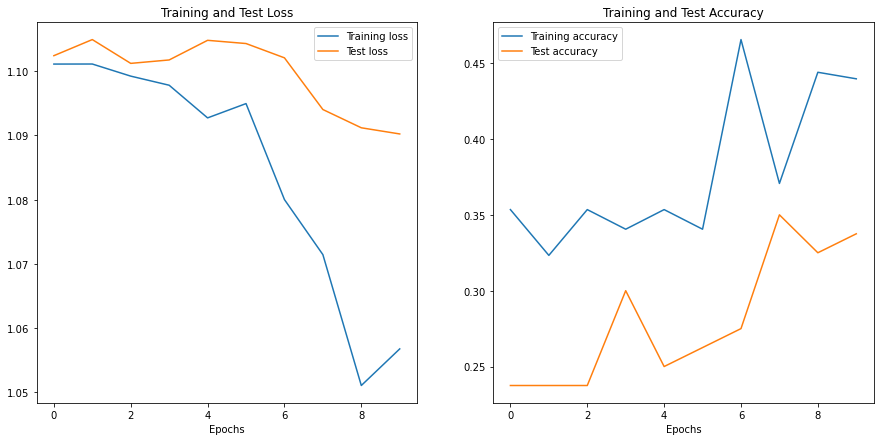

In [63]:
plot_loss_curves(model_1_results)

Making my own dataset with augmentatin

In [64]:
my_train_transform_1  = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.TrivialAugmentWide(num_magnitude_bins=31),
transforms.ToTensor()
])

my_test_transform = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.ToTensor()
])

In [65]:
#Create train and test datasets using data augmentation
my_train_data_augumented_1 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_1)
my_train_data_augumented_2 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_1)
my_train_data_augumented_3 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_1)


my_test_data = datasets.ImageFolder(root=test_dir, 
            transform=test_transform_simple) 

In [66]:
#Combinig dataset

from torch.utils.data import ConcatDataset
my_train_combined_dataset_1 = ConcatDataset([my_train_data_augumented_1, my_train_data_augumented_2,
my_train_data_augumented_3])

In [67]:
#Comparing datasets
len(my_train_combined_dataset_1), len(train_data_augumented), len(train_data_simple)

(675, 225, 225)

In [68]:
my_train_dataloader_augumented_1 = DataLoader(dataset=my_train_combined_dataset_1,
batch_size=BATCH_SIZE,
shuffle=True,
num_workers=NUM_WORKERS)

my_test_dataloader_simple = DataLoader(dataset=my_test_data,
batch_size=BATCH_SIZE,
shuffle=False,
num_workers=NUM_WORKERS)

In [69]:
#Comparing dataloaders
len(my_train_dataloader_augumented_1), len(train_dataloader_augumented), len(train_data_loader_simple)

(22, 29, 8)

In [70]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)



my_model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=my_model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

my_model_1_results = train(model=my_model_1,
                        train_dataloader=my_train_dataloader_augumented_1,
                        test_dataloader=my_test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.0981, Train_acc: 0.3456, Test_loss: 1.1076, Test_acc: 0.3125
Epoch: 1 | Train_loss: 1.0433, Train_acc: 0.4598, Test_loss: 1.0544, Test_acc: 0.4337
Epoch: 2 | Train_loss: 1.0095, Train_acc: 0.5076, Test_loss: 1.0739, Test_acc: 0.4034
Epoch: 3 | Train_loss: 0.9785, Train_acc: 0.5464, Test_loss: 1.0366, Test_acc: 0.4223
Epoch: 4 | Train_loss: 0.9416, Train_acc: 0.5502, Test_loss: 1.0116, Test_acc: 0.4034
Epoch: 5 | Train_loss: 0.9067, Train_acc: 0.5739, Test_loss: 1.0475, Test_acc: 0.3314
Epoch: 6 | Train_loss: 0.9137, Train_acc: 0.5606, Test_loss: 1.0067, Test_acc: 0.4432
Epoch: 7 | Train_loss: 0.8628, Train_acc: 0.6193, Test_loss: 1.0113, Test_acc: 0.4650
Epoch: 8 | Train_loss: 0.8992, Train_acc: 0.5753, Test_loss: 0.9554, Test_acc: 0.5142
Epoch: 9 | Train_loss: 0.8764, Train_acc: 0.6165, Test_loss: 1.0352, Test_acc: 0.4233
Training time: 237.605


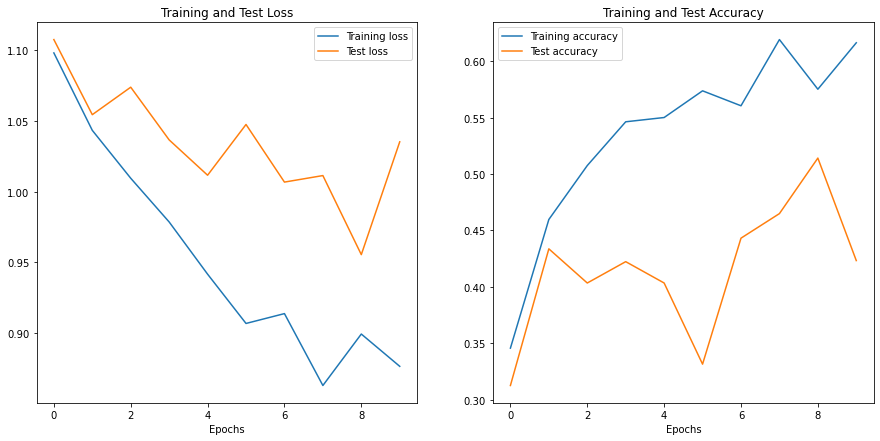

In [71]:
plot_loss_curves(my_model_1_results)

Making my own dataset with ANOTHER augmentatin

In [72]:
my_train_transform_2  = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.RandomHorizontalFlip(p=0.6),
transforms.RandomAdjustSharpness(sharpness_factor=2),
transforms.ToTensor()
])

my_test_transform = transforms.Compose([transforms.Resize(size=(64,64)),
transforms.ToTensor()
])

In [73]:
#Create train and test datasets using data augmentation
my_train_data_augumented_1 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_2)
my_train_data_augumented_2 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_2)
my_train_data_augumented_3 = datasets.ImageFolder(root=train_dir, 
            transform=my_train_transform_2)


my_test_data = datasets.ImageFolder(root=test_dir, 
            transform=test_transform_simple) 

In [74]:
#Combinig dataset

from torch.utils.data import ConcatDataset
my_train_combined_dataset_2 = ConcatDataset([my_train_data_augumented_1, my_train_data_augumented_2,
my_train_data_augumented_3])

In [75]:
my_train_dataloader_augumented_2 = DataLoader(dataset=my_train_combined_dataset_2,
batch_size=BATCH_SIZE,
shuffle=True,
num_workers=NUM_WORKERS)

my_test_dataloader_simple = DataLoader(dataset=my_test_data,
batch_size=BATCH_SIZE,
shuffle=False,
num_workers=NUM_WORKERS)

In [76]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)



my_model_2 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=my_model_2.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

my_model_2_results = train(model=my_model_2,
                        train_dataloader=my_train_dataloader_augumented_2,
                        test_dataloader=my_test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.0965, Train_acc: 0.3357, Test_loss: 1.1044, Test_acc: 0.2812
Epoch: 1 | Train_loss: 0.9606, Train_acc: 0.5303, Test_loss: 1.0313, Test_acc: 0.4233
Epoch: 2 | Train_loss: 0.9005, Train_acc: 0.5672, Test_loss: 1.0707, Test_acc: 0.3324
Epoch: 3 | Train_loss: 0.8514, Train_acc: 0.5866, Test_loss: 1.0077, Test_acc: 0.4640
Epoch: 4 | Train_loss: 0.8436, Train_acc: 0.6141, Test_loss: 1.0271, Test_acc: 0.4044
Epoch: 5 | Train_loss: 0.7353, Train_acc: 0.6903, Test_loss: 1.0304, Test_acc: 0.3627
Epoch: 6 | Train_loss: 0.7158, Train_acc: 0.6894, Test_loss: 1.0114, Test_acc: 0.4347
Epoch: 7 | Train_loss: 0.6756, Train_acc: 0.7102, Test_loss: 1.0214, Test_acc: 0.4650
Epoch: 8 | Train_loss: 0.6629, Train_acc: 0.7259, Test_loss: 0.9986, Test_acc: 0.5161
Epoch: 9 | Train_loss: 0.6552, Train_acc: 0.7173, Test_loss: 1.0065, Test_acc: 0.5057
Training time: 237.653


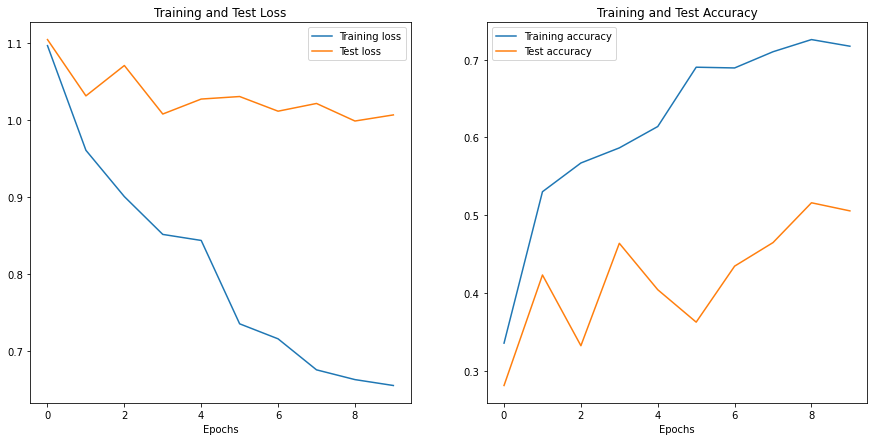

In [77]:
plot_loss_curves(my_model_2_results)

Compare model results

In [78]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
my_model_1_df = pd.DataFrame(my_model_1_results)
my_model_2_df = pd.DataFrame(my_model_2_results)

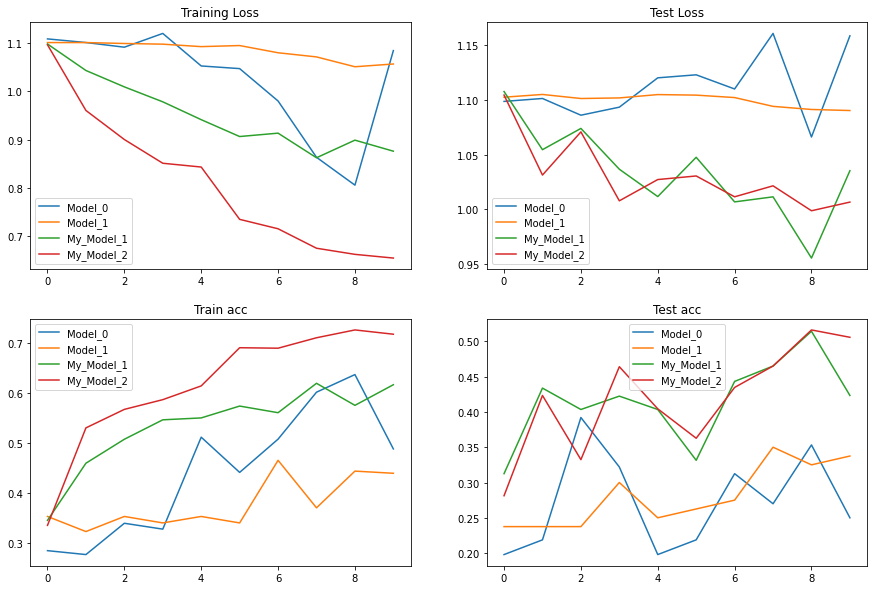

In [79]:
#making a plot

plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label="Model_0")
plt.plot(epochs, model_1_df['train_loss'], label='Model_1')
plt.plot(epochs, my_model_1_df['train_loss'], label='My_Model_1')
plt.plot(epochs, my_model_2_df['train_loss'], label='My_Model_2')
plt.title('Training Loss')
plt.legend()


plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label="Model_0")
plt.plot(epochs, model_1_df['test_loss'], label='Model_1')
plt.plot(epochs, my_model_1_df['test_loss'], label='My_Model_1')
plt.plot(epochs, my_model_2_df['test_loss'], label='My_Model_2')
plt.title('Test Loss')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'], label="Model_0")
plt.plot(epochs, model_1_df['train_acc'], label='Model_1')
plt.plot(epochs, my_model_1_df['train_acc'], label='My_Model_1')
plt.plot(epochs, my_model_2_df['train_acc'], label='My_Model_2')
plt.title('Train acc')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label="Model_0")
plt.plot(epochs, model_1_df['test_acc'], label='Model_1')
plt.plot(epochs, my_model_1_df['test_acc'], label='My_Model_1')
plt.plot(epochs, my_model_2_df['test_acc'], label='My_Model_2')
plt.title('Test acc')
plt.legend()


Making a prediction on a custom photo


In [97]:
import requests
custom_image_path = data_path/"04_pizza_dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file(): 
    with open(custom_image_path, "wb") as f:
    # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print (f" {custom_image_path} already exists, skipping download...")

 data/04_pizza_dad.jpeg already exists, skipping download...


In [98]:
import torchvision
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8


tensor([[[154, 175, 181,  ...,  21,  18,  14],
         [146, 167, 180,  ...,  21,  18,  15],
         [124, 146, 171,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 189, 193,  ...,  22,  19,  15],
         [163, 181, 194,  ...,  22,  19,  16],
         [141, 163, 185,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 106, 104, 102],
         [ 47,  38,  24,  ..., 108, 105, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[117, 138, 145,  ...,  17,  14,  10],
         [109, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  54,  52,  50],
         [ 27,  18,   4,  ...,  50,  47,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

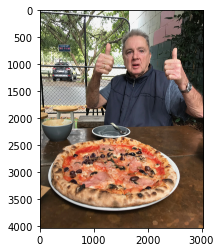

In [99]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [100]:
print (custom_image_uint8.shape)
print (custom_image_uint8.dtype)
print (type(custom_image_uint8))

torch.Size([3, 4032, 3024])
torch.uint8
<class 'torch.Tensor'>


In [106]:
# we need to convert image from ByteTensor to FloatTensor that was used in model training process
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
custom_image

tensor([[[0.6039, 0.6863, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6549, 0.7059,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6706,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7412, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7098, 0.7608,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7255,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4157, 0.4078, 0.4000],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4118, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4588, 0.5412, 0.5686,  ..., 0.0667, 0.0549, 0.0392],
         [0.4275, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [105]:
model_1.eval()
with torch.inference_mode():
    model_1(custom_image.to(device))



RuntimeError: linear(): input and weight.T shapes cannot be multiplied (20x756765 and 3380x3)

In [116]:
# Making a pipine to resize an image
from torchvision import transforms

custom_image_transform = transforms.Compose([transforms.Resize(size=(64,64))])
custom_image_transformed = custom_image_transform(custom_image)
custom_image_transformed.shape

torch.Size([3, 64, 64])

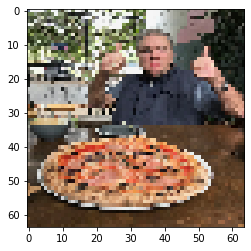

In [117]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [119]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))


RuntimeError: linear(): input and weight.T shapes cannot be multiplied (20x169 and 3380x3)

In [123]:
# Need to add a batch size
custom_image_transformed = custom_image_transformed.unsqueeze(0)

In [143]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = my_model_2(custom_image_transformed.to(device))

In [144]:
# Logits->probs->labels

custom_image_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_probs

tensor([[0.4528, 0.2204, 0.3268]], device='mps:0')

In [145]:
# Probs -> labels
custom_image_labels = torch.argmax(custom_image_probs, dim=1)
custom_image_labels

tensor([0], device='mps:0')

In [146]:
#answer
answer = class_names[custom_image_labels]
answer

'pizza'

IS GOOD TO MAKE ALL LAST THINGS WITH SIMGLE IMAGE INTO ONE FUNCTION

In [147]:
!nvidia-smi

zsh:1: command not found: nvidia-smi
